In [1]:
import numpy as np
import os
import sys
import time
try:
    from builder import *
    from utils import *
    from loader import *

Using backend: pytorch


In [3]:
m = 24
jsonList = get_list_json(m)
nb_classes = len(get_Classes_mIterations(m))
s = [0.5, 0.9]

X_train, X_test, y_train, y_test = train_test_split(jsonList, jsonList, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

trainset = STgraph(X_train, s)
validset = STgraph(X_val, s)
testset = STgraph(X_test, s)

In [4]:
trainset.unique_labels

array(['before', 'book', 'candy', 'chair', 'clothes', 'computer', 'drink',
       'go', 'who'], dtype='<U8')

In [4]:
net_params, params = init_params(trainset, nb_classes)
net_params["gpu"] = 1

train_loader, valid_loader, test_loader = load_data(trainset, validset, testset, 32)

In [5]:
model, A = train_val_pipeline(train_loader, test_loader, valid_loader, params, net_params)

  5%|▌         | 50/1000 [30:26<9:38:22, 36.53s/it] 

Epoch    50: reducing learning rate of group 0 to 5.0000e-04.


  9%|▉         | 88/1000 [53:26<9:13:49, 36.44s/it]

Epoch    88: reducing learning rate of group 0 to 2.5000e-04.


 10%|▉         | 99/1000 [1:00:18<9:08:55, 36.55s/it]

Epoch    99: reducing learning rate of group 0 to 1.2500e-04.


 11%|█         | 110/1000 [1:07:13<9:03:58, 36.67s/it]

Epoch   110: reducing learning rate of group 0 to 6.2500e-05.


 12%|█▏        | 121/1000 [1:14:07<8:58:32, 36.76s/it]

Epoch   121: reducing learning rate of group 0 to 3.1250e-05.


 13%|█▎        | 132/1000 [1:20:58<8:52:30, 36.81s/it]

Epoch   132: reducing learning rate of group 0 to 1.5625e-05.


 14%|█▍        | 142/1000 [1:27:15<8:47:14, 36.87s/it]

Epoch   143: reducing learning rate of group 0 to 7.8125e-06.

!! LR EQUAL TO MIN LR SET.


Test Accuracy: 0.6562
Train Accuracy: 1.0000
Convergence Time (Epochs): 142.0000
TOTAL TIME TAKEN: 5277.3780s
AVG TIME PER EPOCH: 36.8780s


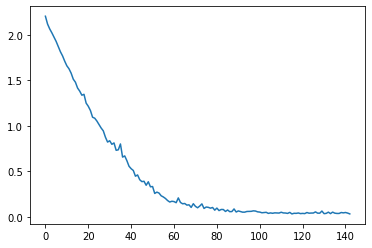

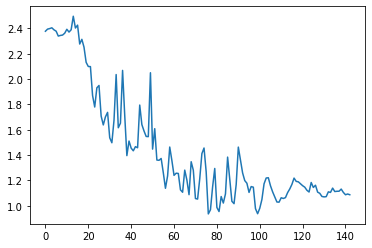

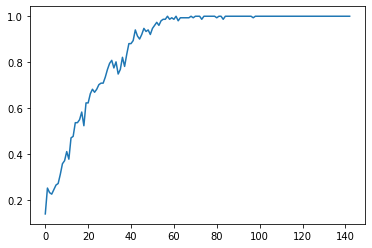

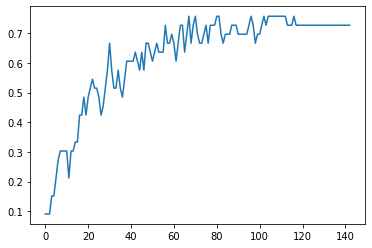

In [6]:
import matplotlib.pyplot as plt
for a in A : 
    plt.figure()
    plt.plot(a)
    plt.show()

In [9]:
PATH = "/home/nmiguens/Python/GatedGCN/modelSaved.model"
torch.save(model.state_dict(), PATH)

In [10]:
from GatedGCN.gated_gcn_net import *



the_model = GatedGCNNet(net_params)
the_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [11]:
the_model.eval()

GatedGCNNet(
  (embedding_h): Linear(in_features=34, out_features=70, bias=True)
  (embedding_e): Linear(in_features=1, out_features=70, bias=True)
  (layers): ModuleList(
    (0): GatedGCNLayer(in_channels=70, out_channels=70)
    (1): GatedGCNLayer(in_channels=70, out_channels=70)
    (2): GatedGCNLayer(in_channels=70, out_channels=70)
    (3): GatedGCNLayer(in_channels=70, out_channels=70)
  )
  (MLP_layer): MLPReadout(
    (FC_layers): ModuleList(
      (0): Linear(in_features=70, out_features=35, bias=True)
      (1): Linear(in_features=35, out_features=17, bias=True)
      (2): Linear(in_features=17, out_features=9, bias=True)
    )
  )
)